In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import sympy as sy

## Problem 1

In [4]:
def problem1(A):
    sigmas = linalg.svd(A)[1]
    condition_number = sigmas.max()/sigmas.min() if sigmas.min() != 0 else np.inf
    return condition_number

In [5]:
## Validate
print(np.linalg.cond(np.eye(2)), problem1(np.eye(2)))
array0 = np.array([[.8, .1], [0.3, 0.6]])
print(np.linalg.cond(array0), problem1(array0))

1.0 1.0
1.9249505911485287 1.9249505911485287


## Problem 2

In [6]:
def problem2():
    fig, ax= plt.subplots(3, 1, figsize=(10, 10))
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_roots = range(1,21)
    w_coeffs = np.array(w.all_coeffs())
    ax[0].scatter(range(1, 21), [0]*20)
    mu, sigma = 1, 10e-10
    kL, r_kL = [], []
    for i in range(100):
        perturbs = np.random.normal(mu, sigma, 21)
        new_roots = w_coeffs*perturbs
        h = new_roots-w_coeffs
        new_roots = np.roots(np.poly1d(new_roots))
        new_roots = np.sort(new_roots)

        k = linalg.norm(new_roots - w_roots, np.inf) / linalg.norm(h, np.inf)
        r_k = k * linalg.norm(w_coeffs, np.inf) / linalg.norm(w_roots, np.inf)
        kL.append(k)
        r_kL.append(r_k)

        ax[0].plot(np.real(new_roots), np.imag(new_roots), 'k,')
        ax[1].plot(i,k, 'k,')
        ax[2].plot(i,r_k, 'k,')

    ax[0].set_ylabel('Imaginary Axis')
    ax[0].set_xlabel('Real Axis')
    ax[1].set_ylabel('Absolute condition number')
    ax[1].set_xlabel('Iteration')
    ax[2].set_ylabel('Relative condition number')
    ax[2].set_xlabel('Iteration')
    plt.show()
    print('Average absolute condition number', sum(kL)/100)
    print('Relative absolute condition number', sum(r_kL)/100)

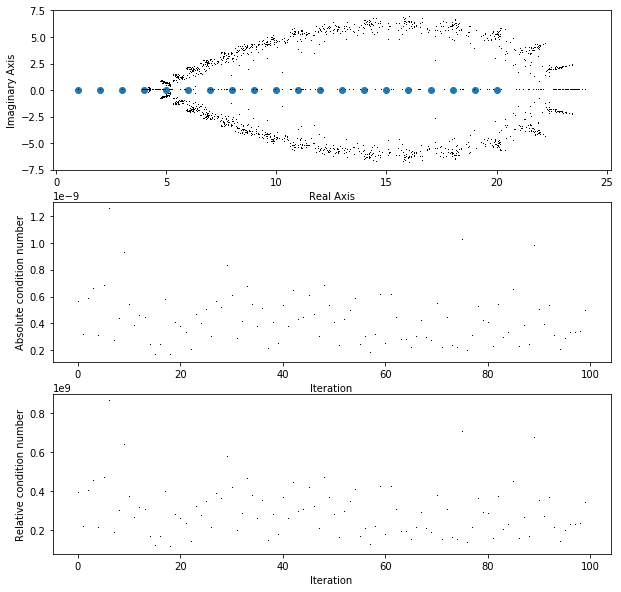

Average absolute condition number 4.24795919762956e-10
Relative absolute condition number 293189041.036734


In [7]:
problem2()

## Problem 3

In [8]:
def get_At(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals+1j*imags
    A_t = A + H
    return A_t, H

def problem3(A):   
    At, H = get_At(A)
    
    eigen_A = linalg.eigvals(A)
    eigen_At = linalg.eigvals(At)
    
    k_hat = linalg.norm(eigen_A-eigen_At)/linalg.norm(H)
    k = k_hat*linalg.norm(A)/linalg.norm(eigen_A)
    return k_hat, k

In [9]:
A = np.array([[1, 1], [1, 1+1e-10]])
problem3(A)

(10005276703.010557, 10005276703.010557)

## Problem 4

In [10]:
## TODO ##
def problem4(x, y, res):
    x_grid = np.linspace(x[0], x[1], res)
    y_grid = np.linspace(y[0], y[1], res)
    XX, YY = np.meshgrid(x_grid, y_grid)
    ZZ = np.zeros_like(XX)
    ZZ_hat = np.zeros_like(XX)
    for i in range(res):
        for j in range(res):
            A = np.array([[1, XX[i, j]], [YY[i, j], 1]])
            k_hat, k = problem3(A)
            ZZ_hat[i,j] = k_hat
            ZZ[i,j] = k
    return XX, YY, ZZ_hat, ZZ

In [21]:
XX, YY, ZZ_hat, ZZ = problem4([-100, 100], [-100, 100], 200)

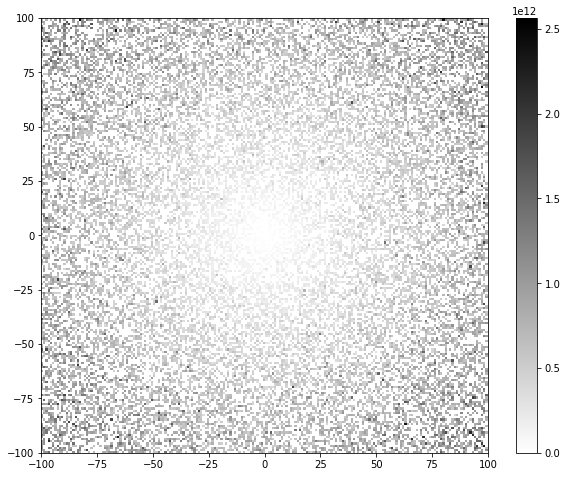

In [22]:
fig, ax= plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(XX, YY, ZZ, cmap='gray_r' )
fig.colorbar(im, ax=ax)
plt.show()

## Problem 5

In [23]:
def problem5(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)

    approach_1 = np.dot(np.dot(linalg.inv(np.dot(A.T, A)), A.T), yk)

    Q, R = linalg.qr(A, mode='economic')
    approach_2 = linalg.solve_triangular(R, np.dot(Q.T, yk))
    fig, ax= plt.subplots(figsize=(10, 5))
    ax.scatter(xk, yk)
    
    ax.plot(xk, np.dot(A, approach_1), label='Normal equations')
    ax.plot(xk, np.dot(A, approach_2), label='QR solver')
    ax.set_ylim([0, 25])
    plt.legend()
    plt.show()

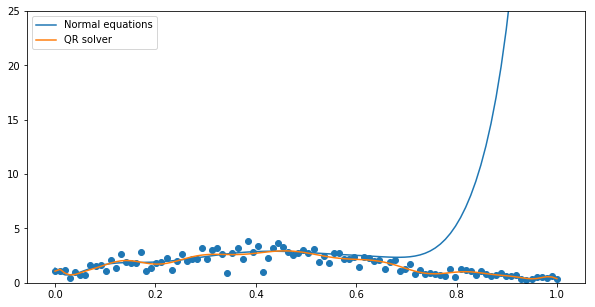

In [24]:
A = problem5(21)